# Scalar

## Step 1: Create Single Atom

Let's define an atom at $\vec{r}_1$

In [1]:
r₁ = [1,1,1]

3-element Vector{Int64}:
 1
 1
 1

## Step 2: Apply Laser

Plane Wave
$\Omega(\vec{r}) = -\frac{i}{2}e^{+ik_0z}$

In [2]:
z₁ = r₁[3]
Ω₁ = -(im/2)exp(im*z₁)

0.42073549240394825 - 0.2701511529340699im

## Step 3: Get State State

Single Atom Evolution
$\frac{d\beta}{dt} = \left ( i\Delta - \frac{\Gamma}{2} \right )\beta + \Omega$

Steady State
$\beta = \frac{-\Omega}{ i\Delta - \frac{\Gamma}{2} }$

In [3]:
Δ = 0 # ressonance
Γ = 1
β₁ = -Ω₁/(im*Δ - Γ/2)

0.8414709848078965 - 0.5403023058681398im

## Step 4: Compute Electric Field (far field)

In general, for a sensor at position $\vec{R}$

$E(\vec{R}) = -\frac{\Gamma}{2} \frac{e^{ikR}}{R}\sum_j \beta_j e^{-i \hat{R}\cdot \vec{r}_j}$


For single atom case

$E(\vec{R}) = -\frac{\Gamma}{2} \frac{e^{ikR}}{R} \beta_1 e^{-i \hat{R}\cdot \vec{r}_1}$


In [4]:
R = [0,0,100]

using LinearAlgebra
R_hat = R./norm(R)
E₁ = -(Γ/2)*(exp(+im*norm(R))/norm(R))*β₁*exp(-im*dot(R_hat, r₁))

0.0025318282055487944 + 0.004311594361438419im

Total Electric Field Scattered = E_laser + E_scattered

In [5]:
E_laser_R = -(im/2)exp(im*R[3])
E_scattered = E₁ + E_laser_R

-0.2506509923493306 - 0.42684784178240354im

## Step 5: Compute Intensity

$ I = |E(\vec{R})|^2$

In [6]:
I₁ = abs2(E₁)

2.5e-5

## Step 6: Check intensity over more positions

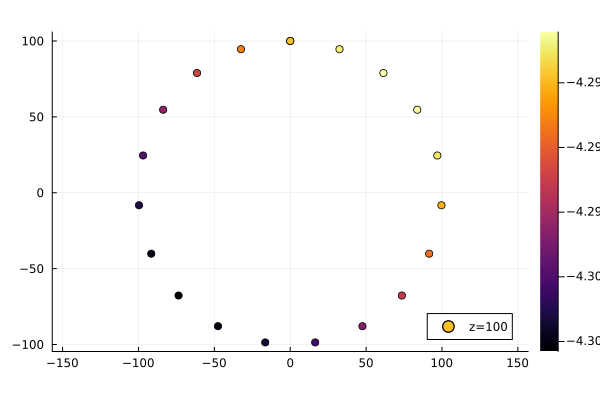

In [7]:
function obtain_intensity(r₁, β₁, R)
    ikRr1 = im*norm(R - r₁)
    E₁ = -β₁*exp(ikRr1)/(ikRr1)
    I₁ = abs2(E₁)
    return I₁
end

## create a ring of points at z=100
θ = LinRange(0, 2π, 20)
radius = 100
x = radius .* sin.(θ)
y = radius .* cos.(θ)
z = radius .* ones(length(θ))

I_ring = map(eachrow(hcat(x,y,z))) do R
    obtain_intensity(r₁, β₁, R)
end

using Plots
scatter(x,y, zcolor=log10.(I_ring), aspect_ratio=1, label="z=$(radius)")

# Vectorial

## Step 1: Create Single Atom

In [1]:
r₁ = [0,-1,1/2]

3-element Vector{Float64}:
  0.0
 -1.0
  0.5

## Step 2: Apply Laser

Plane Wave with Polarization at $\hat{x}$-direction, and Propagation at $\hat{z}$-direction

$\vec{\Omega}(\vec{r}) -\frac{i}{2}\begin{bmatrix}
e^{+ik_0z} \\
0 \\
0 
\end{bmatrix}$

In [2]:
z₁ = r₁[3]
# Ω₁ = -(im/2)*[exp(im*z₁), 0, 0]
Ω₁ = -(im/2)*[0, exp(im*z₁), 0]

3-element Vector{ComplexF64}:
                0.0 - 0.0im
 0.2397127693021015 - 0.4387912809451864im
                0.0 - 0.0im

## Step 3: Get State State

Single Atom Evolution
$\frac{d\vec{\beta}}{dt} = \left ( i\Delta - \frac{\Gamma}{2} \right )\vec{\beta} + \vec{\Omega}$

Steady State
$\vec{\beta} = -\frac{1}{ i\Delta - \frac{\Gamma}{2} }\vec{\Omega}$

In [3]:
Δ = 0.0 # ressonance
Γ = 1.0
β₁ = -Ω₁/(im*Δ - Γ/2)

3-element Vector{ComplexF64}:
               0.0 - 0.0im
 0.479425538604203 - 0.8775825618903728im
               0.0 - 0.0im

## Step 4: Compute Electric Field (far field)

In general, for a sensor at position $\vec{R}$

$E^\mu(\vec{R}) = -\frac{1}{4\pi}\frac{e^{ik_0R}}{k_0R}\sum_j\sum_\eta(\delta_{\mu, \eta} - \hat{n}_\mu\hat{n}_\eta^*)exp(-ik_0\hat{\mathbf{n}}\cdot\mathbf{r}_j)\beta_j^\eta(t)$


For single atom case

$E^\mu(\vec{R}) = -\frac{1}{4\pi}\frac{e^{ik_0R}}{k_0R}\sum_\eta(\delta_{\mu, \eta} - \hat{n}_\mu\hat{n}_\eta^*)exp(-ik_0\hat{\mathbf{n}}\cdot\mathbf{r}_1)\beta_1^\eta(t)$

In [8]:
# R = [π,-900,1000]
R = [1,0,0]

using LinearAlgebra
n_hat = R./norm(R)

μ = 1
E_x = -(1/4π)*(exp(im*norm(R))/norm(R))*sum(  (float(μ==η) - n_hat[μ]*n_hat[η]')*exp(-im*dot(n_hat, r₁))*β₁[η]  for η=1:3 )

μ = 2
E_y = -(1/4π)*(exp(im*norm(R))/norm(R))*sum(  (float(μ==η) - n_hat[μ]*n_hat[η]')*exp(-im*dot(n_hat, r₁))*β₁[η]  for η=1:3 )

μ = 3
E_z = -(1/4π)*(exp(im*norm(R))/norm(R))*sum(  (float(μ==η) - n_hat[μ]*n_hat[η]')*exp(-im*dot(n_hat, r₁))*β₁[η]  for η=1:3 )

E₁ = [E_x, E_y, E_z]

3-element Vector{ComplexF64}:
                -0.0 + 0.0im
 -0.0793781289137096 + 0.0056290876529516im
                -0.0 + 0.0im

## Step 5: Compute Intensity

$ I = \sum_\eta |E^{\eta}(\vec{R})|^2$

In [9]:
I₁ = abs2(E₁[1]) + abs2(E₁[2]) + abs2(E₁[3])

0.006332573977646113